###Project Overview:
##*Objective:*
 Analyze sales data to identify trends, customer preferences, and potential areas for improvement in sales strategies.


##*Framework:*
Utilize the CRISP-DM methodology, which includes the following phases:

##*Business Understanding:*
 Define the project objectives and requirements from a business perspective.

##*Data Understanding:*
Collect and explore the sales data to understand its structure and contents.

##*Data Preparation:*
Clean and preprocess the data for analysis.



IMPORT ALL NECESSARY LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATA SET

In [8]:
sales_df= pd.read_csv('sales_data_sample.csv',encoding='latin-1')


DATA EXPLORATION

In [10]:
print(sales_df.head())
print(sales_df.info())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

DATA CLEANING

In [12]:
# Check for null values in the dataset
null_values = sales_df.isnull().sum()

# Display the count of null values for each column
print(null_values)

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [32]:
sales_df.dropna(inplace=True)

In [14]:
sales_df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


##Data visualizations:


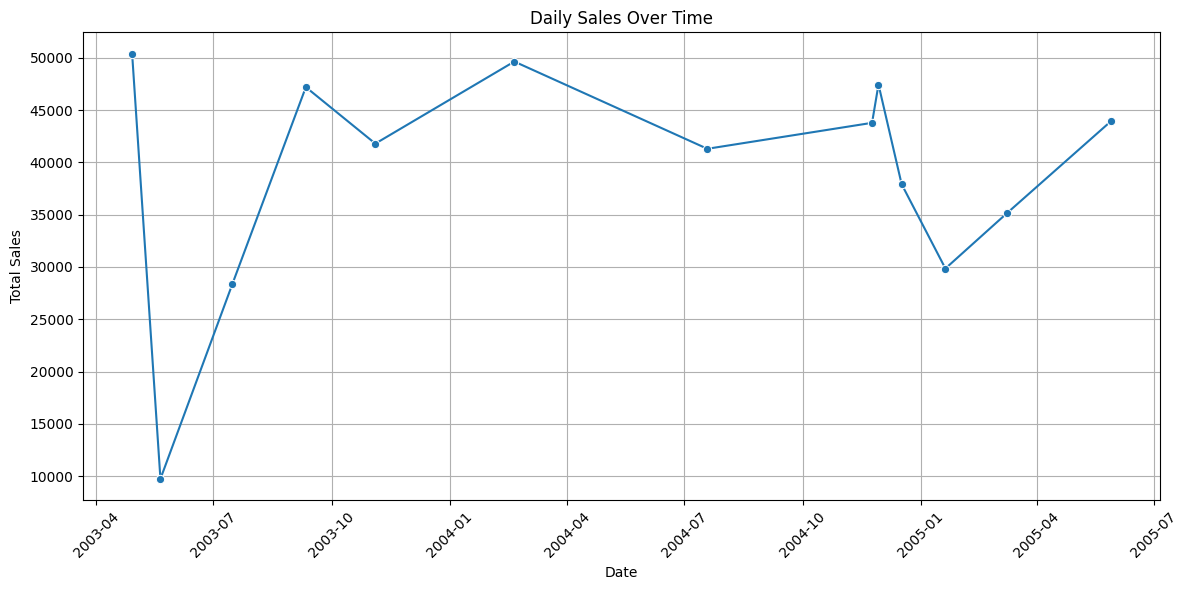

In [19]:
#1. Line Plot for Sales Trends Over Time
# Convert Date to datetime
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])

# Group by date and sum sales
daily_sales = sales_df.groupby('ORDERDATE')['SALES'].sum().reset_index()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ORDERDATE', y='SALES', marker='o')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

<ipython-input-20-ad8bfabc56e6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='PRODUCTLINE', y='SALES', palette='viridis')


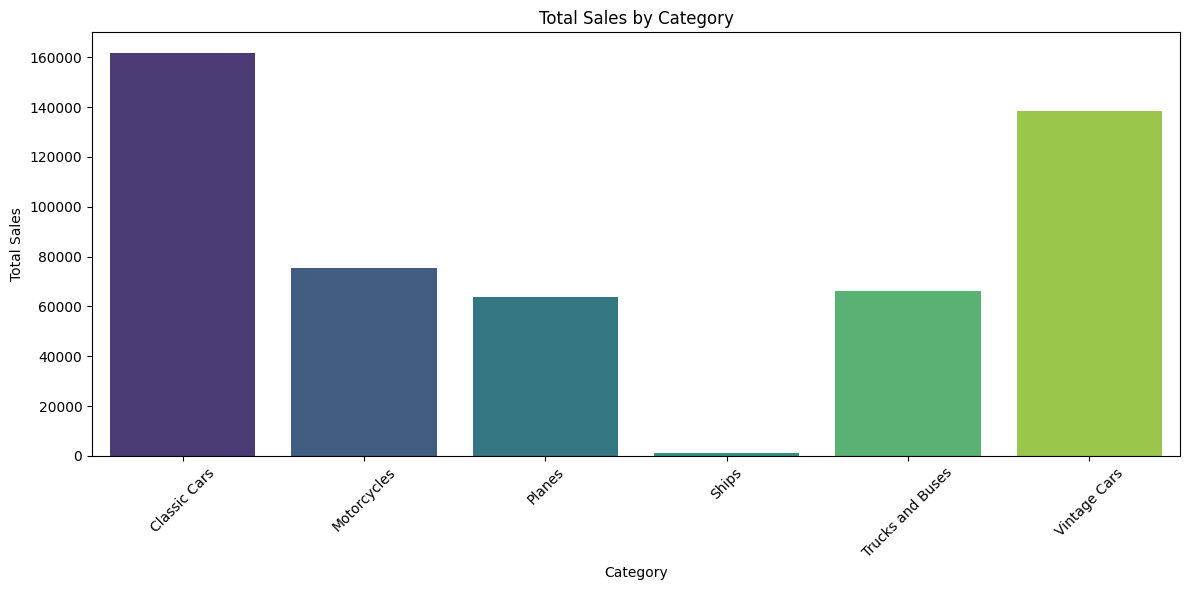

In [20]:
# Bar chart for sales by category
category_sales = sales_df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='PRODUCTLINE', y='SALES', palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

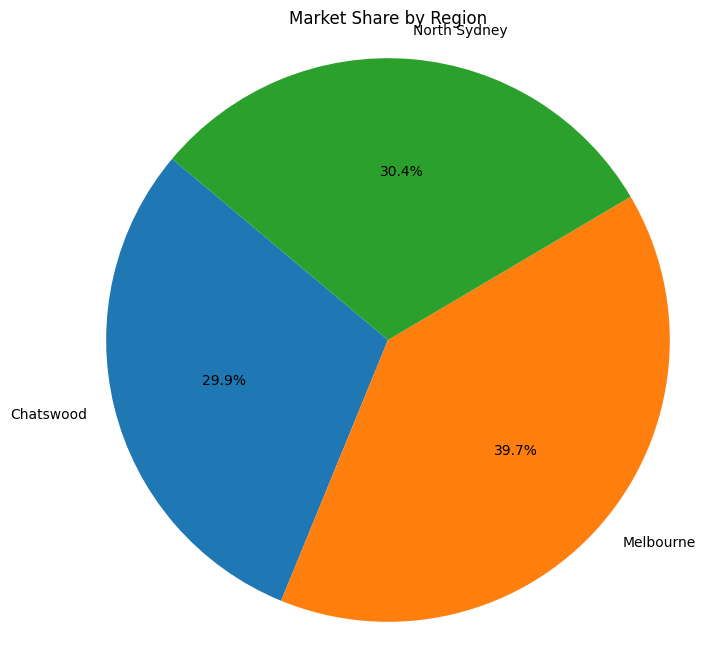

In [23]:
# Pie chart for sales by region
region_sales = sales_df.groupby('CITY')['SALES'].sum()

plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Share by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

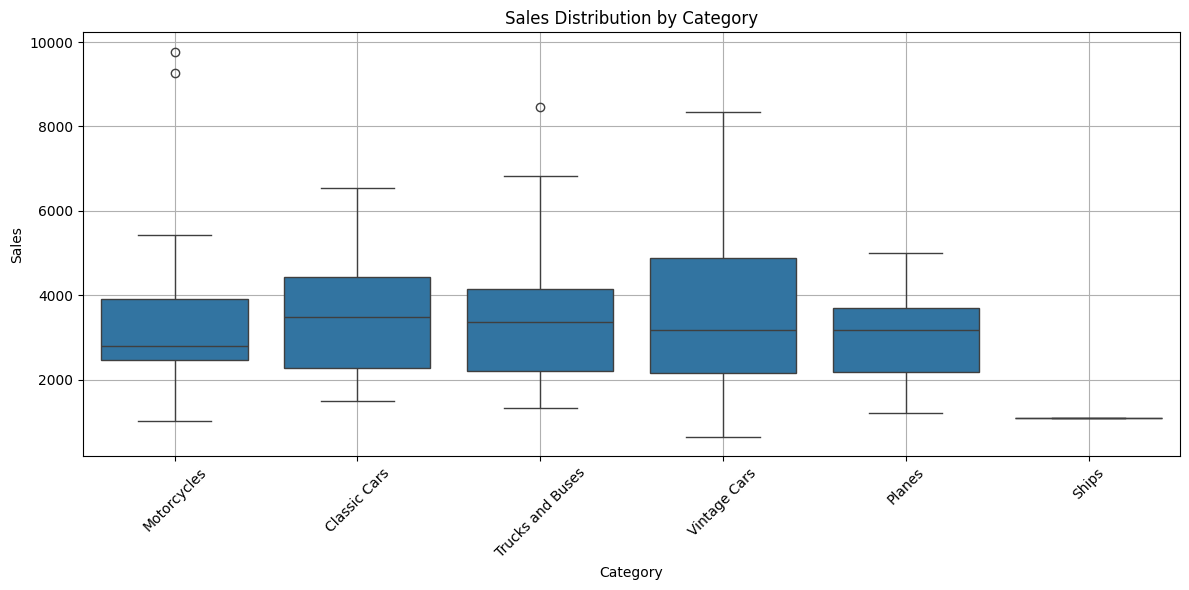

In [25]:
# Box plot for sales distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_df, x='PRODUCTLINE', y='SALES')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

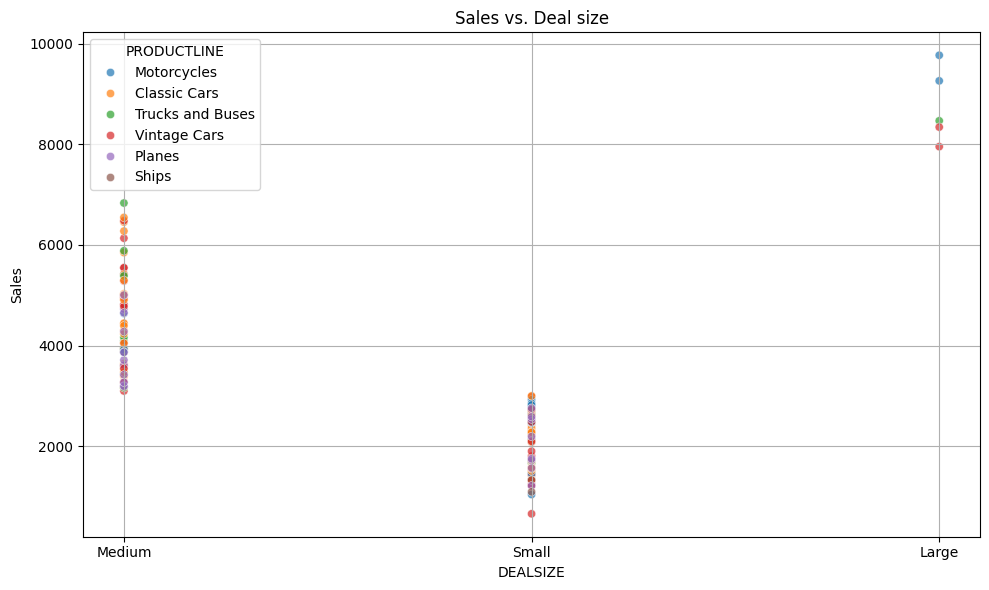

In [30]:
# Scatter plot for Sales vs Deal size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_df, x='DEALSIZE', y='SALES', hue='PRODUCTLINE', alpha=0.7)
plt.title('Sales vs. Deal size')
plt.xlabel('DEALSIZE')
plt.ylabel('Sales')
plt.grid()
plt.tight_layout()
plt.show()

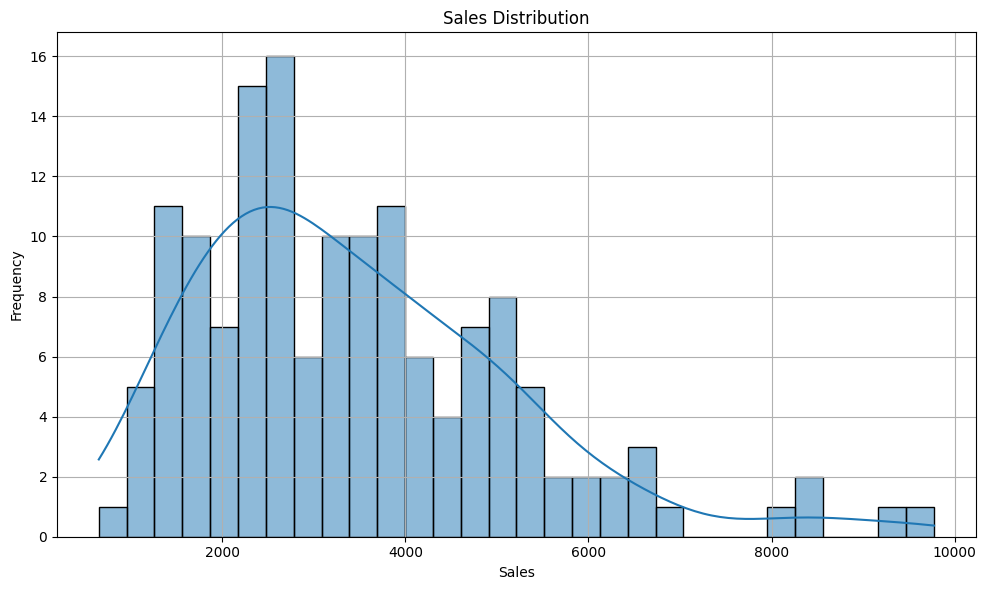

In [31]:
# Histogram for sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(sales_df['SALES'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

##**Conclusion on the Impact of Sales Data Analysis on Business Operations**

The analysis of sales data using various visualizations has provided valuable insights into the company's performance, customer behavior, and market dynamics. Here are key findings and their implications for business operations:

##**Sales Trends Over Time:**

#Finding:
 The line plot revealed seasonal trends and fluctuations in sales over time, indicating peak sales periods and potential downturns.
#Impact:
 Understanding these trends allows the business to optimize inventory management, staffing, and marketing campaigns to align with peak sales periods.
#Desired Change:
 Implement a dynamic inventory management system that adjusts stock levels based on predicted sales trends, ensuring product availability during peak periods and reducing excess inventory during downturns.

##**Sales by Category:**

#Finding:
The bar chart highlighted specific categories that significantly outperform others, suggesting strong customer preferences.
#Impact:
 This information can guide product development and marketing strategies, focusing efforts on high-performing categories while reevaluating or discontinuing underperforming ones.
#Desired Change:
 Allocate more resources to the marketing and promotion of high-performing categories, while conducting market research to understand the reasons behind lower sales in other categories.
##**Market Share by Region:**

#Finding:
 The pie chart illustrated the distribution of sales across different regions, revealing areas of strong performance and potential market gaps.
#Impact:
Identifying regions with lower sales can inform targeted marketing strategies and resource allocation to improve market penetration.
#Desired Change:
Develop region-specific marketing campaigns that address local preferences and needs, and consider expanding distribution channels in underperforming regions.
Sales Distribution and Outliers:

Finding: The box plot indicated variations in sales across categories, highlighting outliers that may represent exceptional sales or potential issues.
Impact: Understanding the reasons behind these outliers can lead to better risk management and opportunity identification.
Desired Change: Conduct further analysis on outliers to determine if they are driven by unique customer behavior, promotional events, or operational issues, and adjust strategies accordingly.

##**Sales Distribution:**

#Finding:
 The histogram showed the distribution of sales values, indicating common sales ranges and potential areas for growth.
#Impact:
 Understanding sales distribution can inform pricing strategies and promotional efforts aimed at increasing sales in lower-performing ranges.
#Desired Change:
 Consider introducing targeted promotions or discounts for products in lower sales ranges to stimulate demand and drive overall sales growth.
